In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# # Training 1: updating test set
# local_stats_filepath = '../../models/local_models/2022-11-2_11h33m39s/2022-11-2_11h33m39s_training_stats.csv'
# fed_stats_filepath = '../../models/federated_models/2022-11-2_14h30m28s/2022-11-2_14h30m28s_training_stats.csv'

# Training 2: fixed test set
local_stats_filepath = '../../models/local_models/2022-11-10_23h2m50s/2022-11-10_23h2m50s_training_stats.csv'
fed_stats_filepath = '../../models/federated_models/2022-11-11_8h20m51s/2022-11-11_8h20m51s_training_stats.csv'

In [3]:
df_stats_local = pd.read_csv(local_stats_filepath)
df_stats_local.head()

,accuracy_score,balanced_accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,round_number,site_number
0,0.670188,0.672109,0.692268,0.621622,0.655045,[[1521 812]\r\n [ 593 1334]],1,1
1,0.668338,0.662197,0.563721,0.675209,0.614449,[[1853 583]\r\n [ 938 1212]],1,2
2,0.669797,0.674374,0.745220,0.622853,0.678564,[[1437 944]\r\n [ 533 1559]],1,3
3,0.671983,0.667797,0.590337,0.675302,0.629968,[[1650 564]\r\n [ 814 1173]],1,4
4,0.676871,0.671369,0.578477,0.685484,0.627451,[[2023 624]\r\n [ 991 1360]],1,5


In [4]:
df_stats_fed = pd.read_csv(fed_stats_filepath)
df_stats_fed.head()

,accuracy_score,balanced_accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,round_number,site_number
0,0.673691,0.650275,0.464187,0.687755,0.554276,[[782 153]\n [389 337]],1,1
1,0.676170,0.662053,0.473256,0.732014,0.574859,[[850 149]\n [453 407]],1,2
2,0.674774,0.653508,0.492829,0.670213,0.567994,[[815 186]\n [389 378]],1,3
3,0.672062,0.654797,0.474801,0.703340,0.566904,[[763 151]\n [396 358]],1,4
4,0.665500,0.644511,0.491309,0.648318,0.558998,[[907 230]\n [439 424]],1,5


In [5]:
def plot_report(df_stats_local, df_stats_fed, 
                eval_metric='accuracy_score', x_metric='round_number', split_by='site_number',
                title='site number:', figsize=(10, 10)):

    plt.figure(figsize=figsize)
    n_plots = len(df_stats_local[split_by].unique())
    for split_val in df_stats_local[split_by].unique():
        plt.subplot(n_plots, 1, split_val)
        plt.title(f'{title} {split_val}')

        df_tmp_local = df_stats_local[df_stats_local[split_by] == split_val]
        df_tmp_fed = df_stats_fed[df_stats_fed[split_by] == split_val]

        plt.plot(df_tmp_local[x_metric], df_tmp_local[eval_metric], marker='s', alpha=0.75, label=f'local')
        plt.plot(df_tmp_fed[x_metric], df_tmp_fed[eval_metric], marker='s', alpha=0.75, label=f'federated')
        plt.legend()
        plt.ylabel(eval_metric)
        plt.xticks([i+1 for i in range(n_plots)], df_stats_local[split_by].unique())
    plt.xlabel(x_metric)
    plt.tight_layout()
    plt.show()


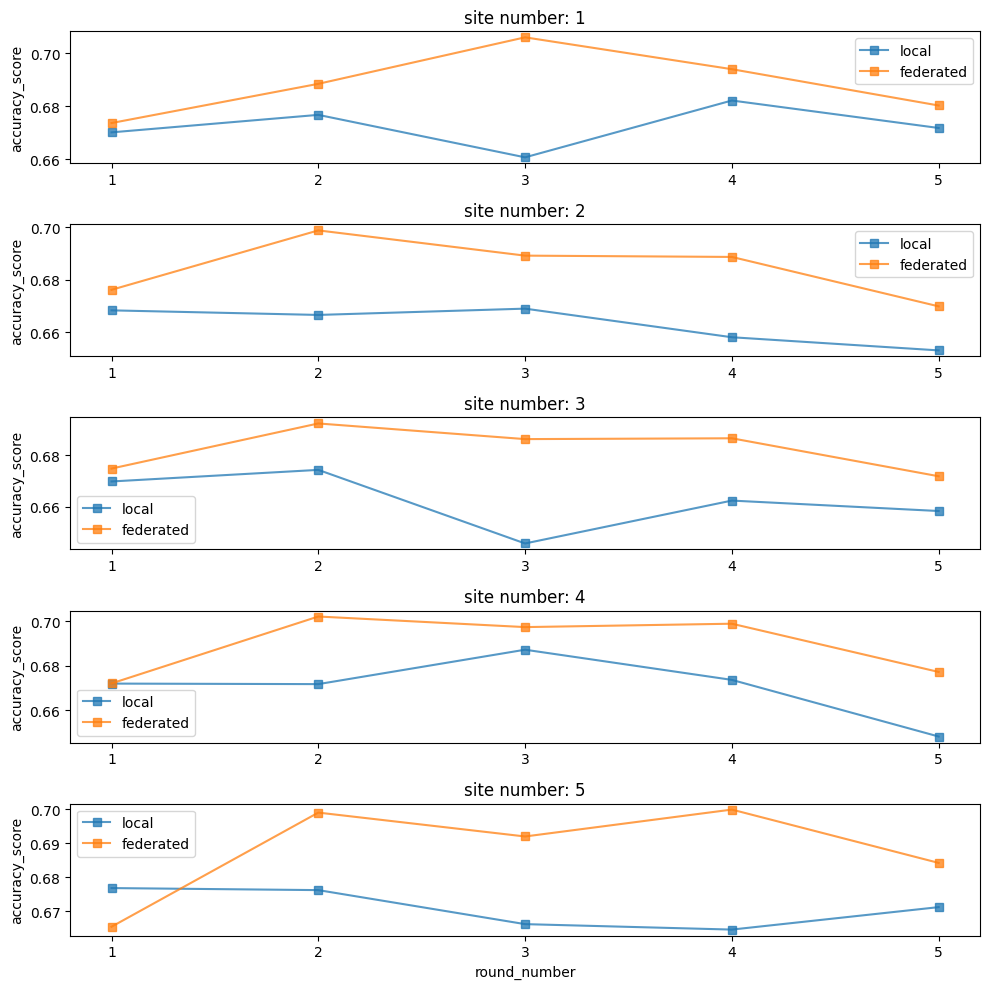

In [6]:
plot_report(df_stats_local, df_stats_fed, eval_metric='accuracy_score')

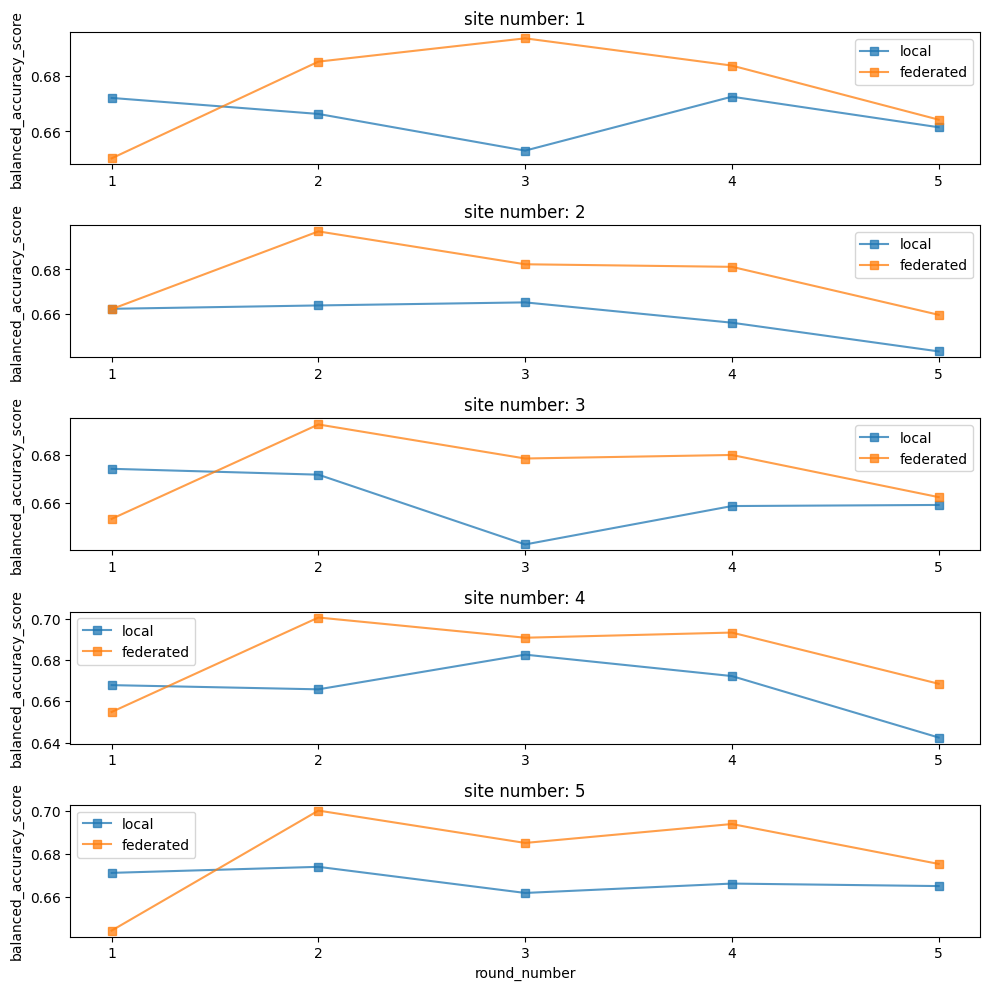

In [7]:
plot_report(df_stats_local, df_stats_fed, eval_metric='balanced_accuracy_score')

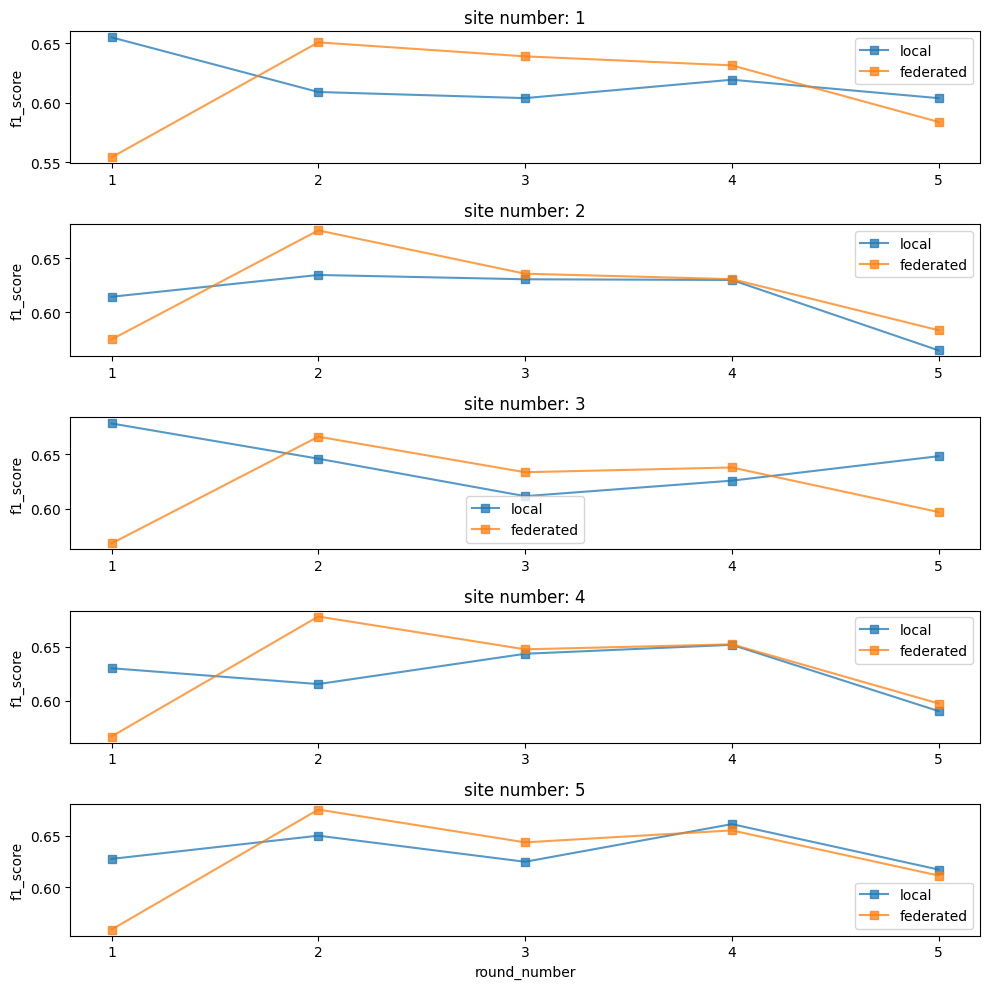

In [8]:
plot_report(df_stats_local, df_stats_fed, eval_metric='f1_score')